In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)


In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 9s 4ms/step - loss: 0.5149 - accuracy: 0.8204 - val_loss: 0.4351 - val_accuracy: 0.8501
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3880 - accuracy: 0.8626 - val_loss: 0.4350 - val_accuracy: 0.8419
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3463 - accuracy: 0.8760 - val_loss: 0.3732 - val_accuracy: 0.8669
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3233 - accuracy: 0.8825 - val_loss: 0.3568 - val_accuracy: 0.8737
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3014 - accuracy: 0.8898 - val_loss: 0.3492 - val_accuracy: 0.8712
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2857 - accuracy: 0.8956 - val_loss: 0.3486 - val_accuracy: 0.8722
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2738 - accuracy: 0.8997 - val_loss: 0.3444 - val_accuracy: 0.8740
Epoch 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8846
Test accuracy: 0.8845999836921692


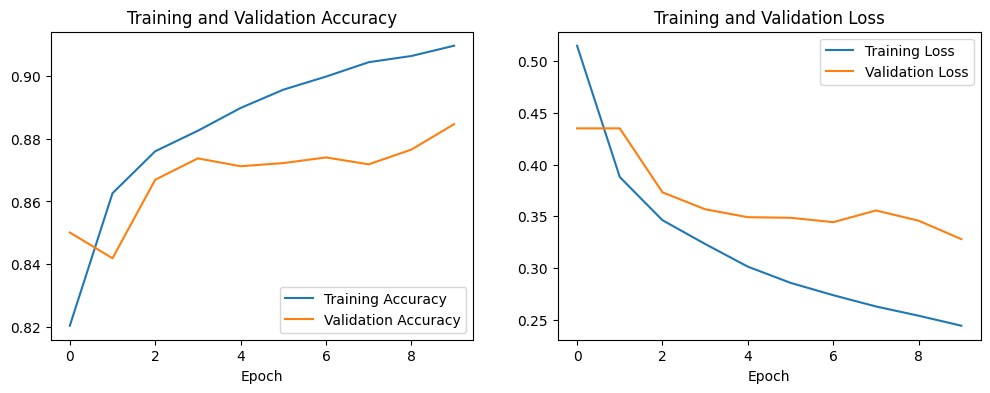

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
